## 1 - Importando as bibliotecas e carregando os dados.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('delitos_novo_nyc.csv',sep=',')

In [3]:
df.head()

,desc_instalacoes,delito,data_da_ocorr,hora_da_ocorr,conclusao,desc_delito,nivel_delito,loc_esp_delito,bairro,latitude,...,dia,mes,ano,dia_da_semana,idade_vitima,raca_vitima,sexo_vitima,noite,assalto,fds
0,COMMERCIAL BUILDING,THEFT-FRAUD,2006-01-01,00:01:00,1,"FRAUD,UNCLASSIFIED-FELONY",crime,dentro,Brooklyn,40.602071,...,1,1,2006,domingo,25-44,WHITE,M,1,0,0
1,RESIDENCE - APT. HOUSE,SEX CRIMES,2006-01-01,00:01:00,1,"SEXUAL ABUSE 3,2",contravencao,dentro,Brooklyn,40.697964,...,1,1,2006,domingo,NaN,UNKNOWN,F,1,0,0
2,RESIDENCE-HOUSE,SEX CRIMES,2006-01-01,00:01:00,1,AGGRAVATED SEXUAL ASBUSE,crime,dentro,Brooklyn,40.671107,...,1,1,2006,domingo,<18,BLACK,F,1,0,0
3,RESIDENCE-HOUSE,SEX CRIMES,2006-01-01,09:00:00,1,SEXUAL ABUSE,crime,dentro,Queens,40.586466,...,1,1,2006,domingo,<18,AMERICAN INDIAN/ALASKAN NATIVE,F,0,0,0
4,RESIDENCE-HOUSE,SEX CRIMES,2006-01-01,00:01:00,1,"SEXUAL ABUSE 3,2",contravencao,dentro,Brooklyn,40.697964,...,1,1,2006,domingo,<18,BLACK,F,1,0,0


In [4]:
# corrigindo a variável fds.
df['fds'] = df['dia_da_semana'].apply(lambda x: 1 if (x=='sabado' or x =='domingo') else 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490508 entries, 0 to 490507
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   desc_instalacoes  488604 non-null  object 
 1   delito            490276 non-null  object 
 2   data_da_ocorr     490508 non-null  object 
 3   hora_da_ocorr     490508 non-null  object 
 4   conclusao         490508 non-null  int64  
 5   desc_delito       490508 non-null  object 
 6   nivel_delito      490508 non-null  object 
 7   loc_esp_delito    409964 non-null  object 
 8   bairro            490507 non-null  object 
 9   latitude          490439 non-null  float64
 10  longitude         490439 non-null  float64
 11  hora              490508 non-null  int64  
 12  dia               490508 non-null  int64  
 13  mes               490508 non-null  int64  
 14  ano               490508 non-null  int64  
 15  dia_da_semana     490508 non-null  object 
 16  idade_vitima      48

In [6]:
df = df.drop(columns='hora_da_ocorr',axis=1)
df['data_da_ocorr'] = pd.to_datetime(df['data_da_ocorr'], format=r'%Y-%m-%d', errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490508 entries, 0 to 490507
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   desc_instalacoes  488604 non-null  object        
 1   delito            490276 non-null  object        
 2   data_da_ocorr     490508 non-null  datetime64[ns]
 3   conclusao         490508 non-null  int64         
 4   desc_delito       490508 non-null  object        
 5   nivel_delito      490508 non-null  object        
 6   loc_esp_delito    409964 non-null  object        
 7   bairro            490507 non-null  object        
 8   latitude          490439 non-null  float64       
 9   longitude         490439 non-null  float64       
 10  hora              490508 non-null  int64         
 11  dia               490508 non-null  int64         
 12  mes               490508 non-null  int64         
 13  ano               490508 non-null  int64         
 14  dia_

## Visualizando a quantidade total de delitos em cada bairro

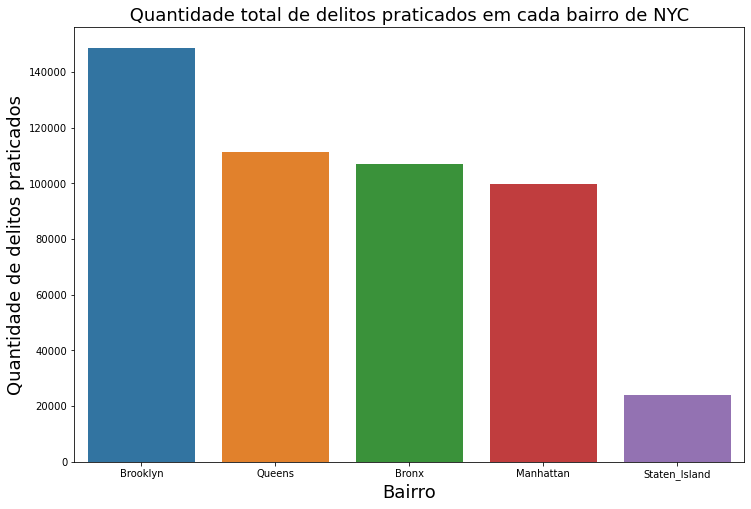

In [8]:
delitos_concluidos_por_bairros_df = df.bairro.value_counts().to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'qtde_delitos']


plt.figure(figsize = (12,8))
sns.barplot(x = 'bairro', y = 'qtde_delitos', data = delitos_concluidos_por_bairros_df)
titulo = ' Quantidade total de delitos praticados em cada bairro de NYC '
plt.ylabel('Quantidade de delitos praticados', fontsize = 18)
plt.xlabel('Bairro', fontsize = 18)
plt.title(titulo, fontsize = 18)
plt.show()

De acordo com  o gráfico acima podemos concluir que o bairro "Brooklyn" apresenta maior quantidade de registros de delitos, enquanto que "Staten Island" apresena uma menor quantidade de registros.



## Distribuição dos delitos cometidos de acordo com o dia do mês

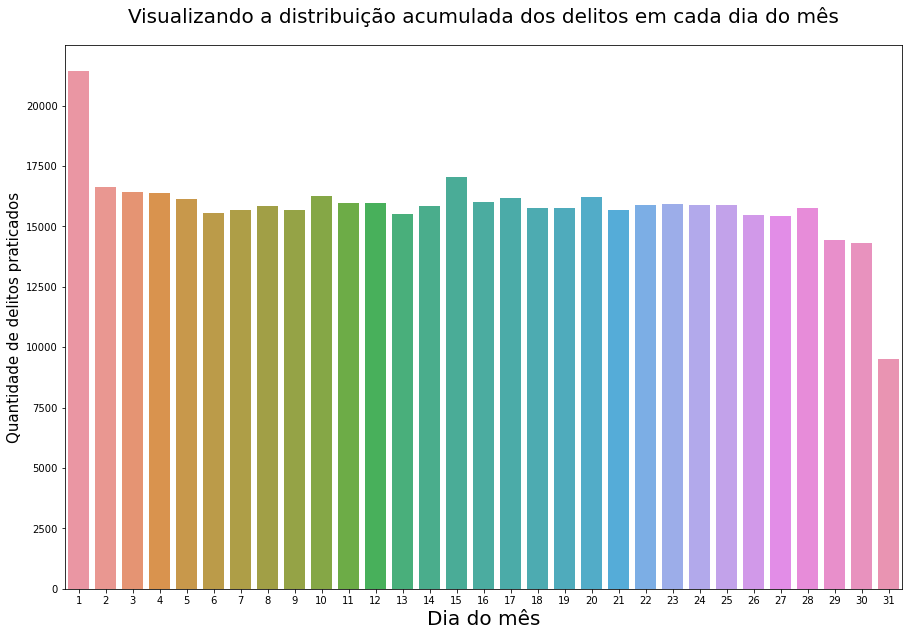

In [9]:
f, ax = plt.subplots(figsize=(15,10))
sns.countplot(x="dia", data=df);
plt.ylabel('Quantidade de delitos praticados', fontsize = 15)
plt.xlabel('Dia do mês', fontsize = 20)
plt.title('Visualizando a distribuição acumulada dos delitos em cada dia do mês', fontsize = 20, y=1.03)
plt.show()

Analisando o gráfico acima pode-se concluir que :

    O dia 31 de cada mês é o que apresenta menos registros de delitos, levando em consideração o total de registros somados em cada dia do mês, ao longo dos anos.
    
    O dia 01 ´o dia que mais aprensenta registros de delitos, levando em consideração o total de registros somados em cada dia domês, ao longo dos anos.
    
    Os demais  dias mantêm-se sempre com valores bem próximos.

## Distribuição acumulada dos delitos praticados em cada mês

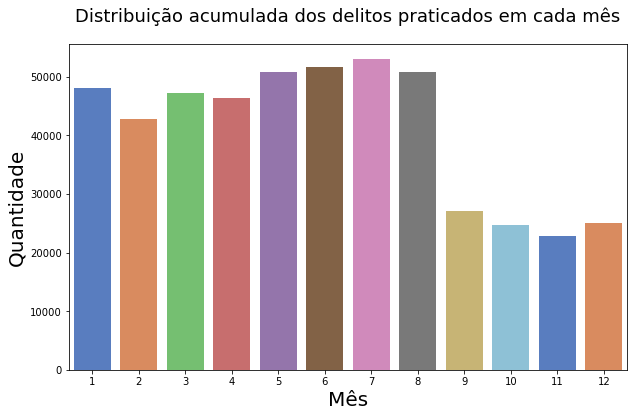

In [10]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="mes",data=df , palette="muted")
titulo='Distribuição acumulada dos delitos praticados em cada mês'
plt.title(titulo, fontsize=18, y=1.05)
plt.ylabel('Quantidade', fontsize = 20)
plt.xlabel('Mês', fontsize = 20)
plt.show()

De acordo com gráfico acima, pode-se concluir que:

    A quantidade de registro de delitos caiquase que pela mentade nos últimos  4 meses do ano.
    
    O mês com maior número de registros é o mês 7.

 # Visualizando em função dos crimes de assalto.




Seguindo com a análise dos delitos, vou trazer visualizações que trazem caracteríticas mais específicas de cada bairro, bem como  os horário que mais acontecem assaltos.


# Distirbuição dos delitos de acordo com período da semana.

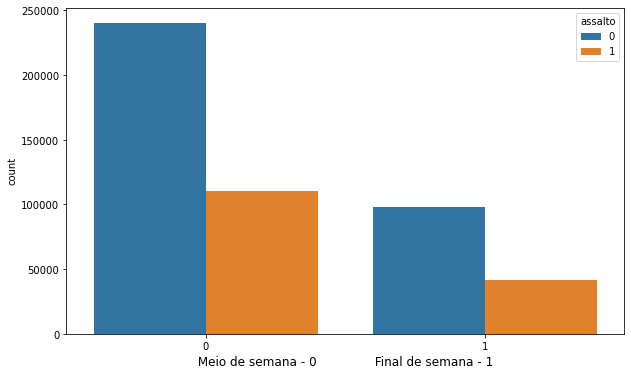

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='fds',hue='assalto',data=df)
plt.xlabel(' Meio de semana - 0               Final de semana - 1 ',fontsize=12)
plt.show()

Pelo gráfico acima pode-se concluir que :

  Os delitos acontecem em sua grande maioria durante a semana.


# Distirbuição dos delitos de acordo com dia da semana.

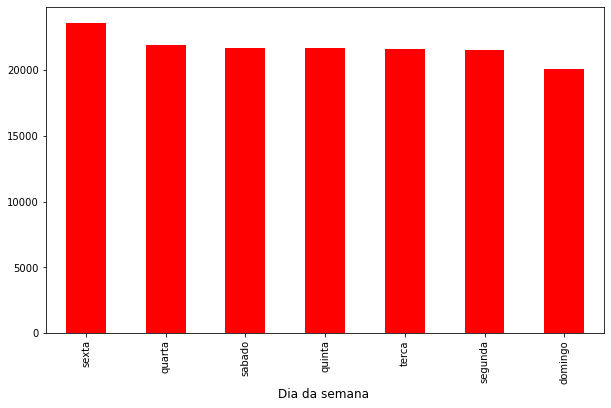

In [12]:
df[df['assalto']==1].dia_da_semana.value_counts().plot(kind='bar',figsize=(10,6),color='r')
plt.xlabel('Dia da semana ',fontsize=12)
plt.show()  

Pelo gráfico acima pode-se concluir que :

  A distribuição acumulada dos assaltos ao longo do dia da semana acontecem quase que e maneira uniforme, podendo destacar 2 dias, sexta-feira que apresenta um valor acima dos valores dos demais dias e domingo, que apresenta um valor abaixo dos valores dos demais dias.

## Distribuição acumulada dos assaltos praticados em cada mês

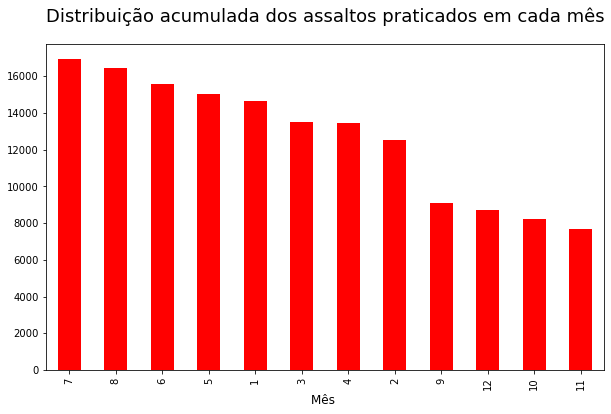

In [13]:
df[df['assalto']==1].mes.value_counts().plot(kind='bar',figsize=(10,6),color='r')
titulo='Distribuição acumulada dos assaltos praticados em cada mês'
plt.title(titulo, fontsize=18, y=1.05)
plt.xlabel('Mês ',fontsize=12)
plt.show()  

Pelo gráfico acima pode-se observar a distribuição dos crimes de assalto ao longo dos meses e é possível concluir que :

  No mês de Julho tem mais ocorências de assalto.

  Nos últimos 4 meses do ano tem-se menos registros de delitos relacionados a assaltos.

## Distribuição acumulada dos assaltos praticados em cada bairro

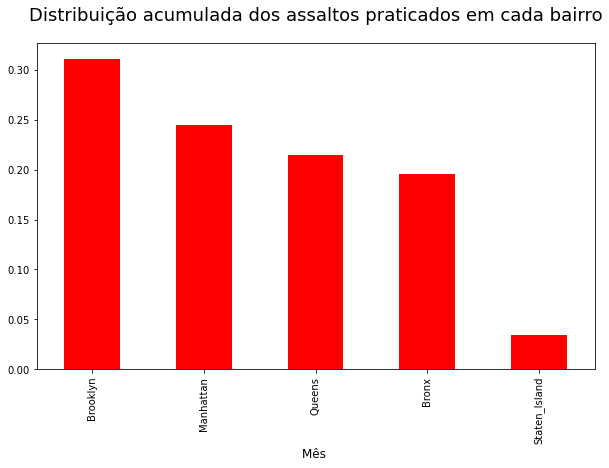

In [14]:
df[df['assalto']==1].bairro.value_counts(normalize=True).plot(kind='bar',figsize=(10,6),color='r')
titulo='Distribuição acumulada dos assaltos praticados em cada bairro'
plt.title(titulo, fontsize=18, y=1.05)
plt.xlabel('Mês ',fontsize=12)
plt.show()  

De acorodo com o gráfico acma pode-se concluir que delitos relacionados a assalto ocorrem em maior quantidade nos bairros  "Brooklyn" e "Manhatan".

## Distribuição dos assaltos por hora

In [15]:
df[df['assalto']==1].noite.value_counts(normalize=True)

0    0.527856
1    0.472144
Name: noite, dtype: float64

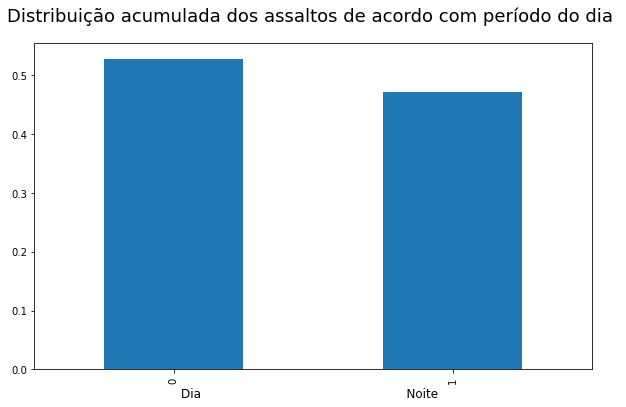

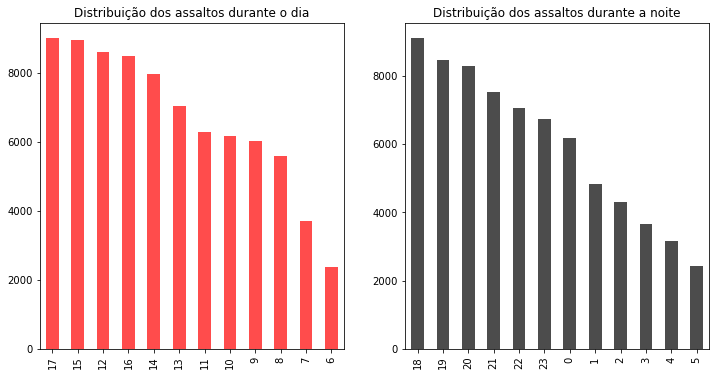

In [16]:
df[df['assalto']==1].noite.value_counts(normalize=True).plot(kind='bar',figsize=(10,6))
titulo='Distribuição acumulada dos assaltos de acordo com período do dia '
plt.title(titulo, fontsize=18, y=1.05)
plt.xlabel('Dia                                                     Noite  ',fontsize=12)

fig, ax = plt.subplots(1,2, figsize=(12,6))

df[(df['assalto']==1) & (df['noite']==0)].hora.value_counts().plot(kind='bar',ax=ax[0],color='r',alpha=0.7)
ax[0].set_title('Distribuição dos assaltos durante o dia')

df[(df['assalto']==1) & (df['noite']==1)].hora.value_counts().plot(kind='bar',ax=ax[1],color='k',alpha=0.7)
ax[1].set_title('Distribuição dos assaltos durante a noite')

plt.show()  

De acordo com os gráficos acima, pode-se concluir que:

 - A quantidade de assaltos com relação ao período do dia(diurno ou noturno) é bem próxima, tendo um pouco mais de casos no período diruno.
 - Durante o dia, os horário com maior quantidade de registros são durante a parte da tarde, tendo seu pico as 17 e 15 horas e durante o início da manhã, tem-se uma quantidade bem menor de registros, caindo quase que pela metade com relação ao ápice.
 - Quando se aproxima das 12 horas a quantidade de registros cresce.
 - Durante a noite, tem-se o ápice as 18 horas, sendo o intervalo entre as 18 e 20 horas os que mais tem registros de assaltos.
 - No início da madrugada e próximo ao amanhecer, os assaltos caem quase que pela metade com relação ao ápice.
 - Analisando os 2 gráficos, o horário de pico para assaltos está entre 17 e 19 horas.

# Brooklyn

## Analisando os assaltos no bairro, de acordo com horário.

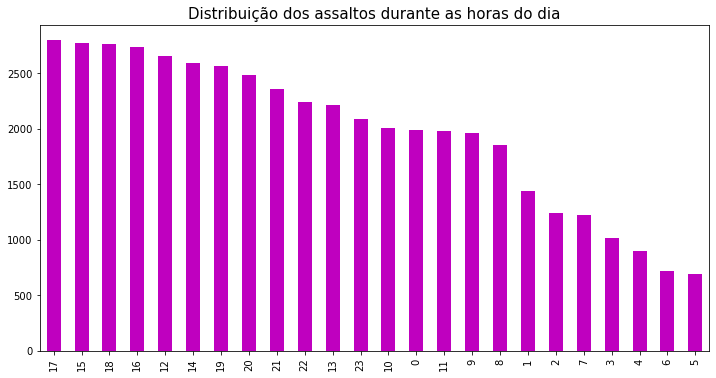

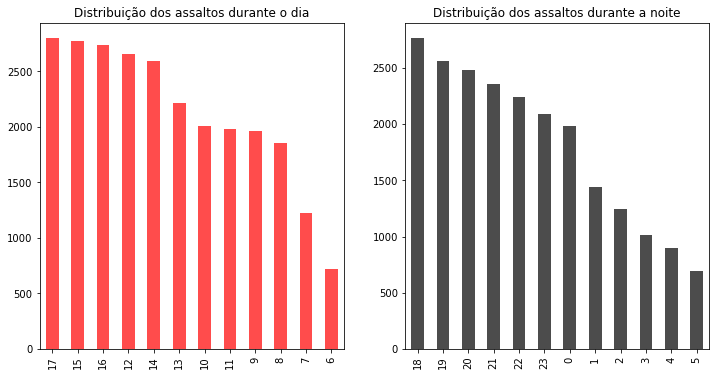

In [17]:
df[(df['assalto']==1) & (df['bairro']=="Brooklyn")].hora.value_counts().plot(kind='bar',figsize=(12,6),color='m')
plt.title('Distribuição dos assaltos durante as horas do dia',fontsize=15)

fig, ax = plt.subplots(1,2, figsize=(12,6))

df[(df['assalto']==1) & (df['noite']==0)  & (df['bairro']=="Brooklyn")].hora.value_counts().plot(kind='bar',ax=ax[0],color='r',alpha=0.7)
ax[0].set_title('Distribuição dos assaltos durante o dia')

df[(df['assalto']==1) & (df['noite']==1)  & (df['bairro']=="Brooklyn")].hora.value_counts().plot(kind='bar',ax=ax[1],color='k',alpha=0.7)
ax[1].set_title('Distribuição dos assaltos durante a noite')
plt.show()

Pelos gráficos acima pode-se concluir que no bairro  **Brooklyn** :

 - Entre as 15 e 20 horas é o período que mais ocorrem assaltos.
 - O horário com mais registros é 17 horas.
 - O período com menos ocorrências de assaltos vai das 3 horas até às 7 da manhã.

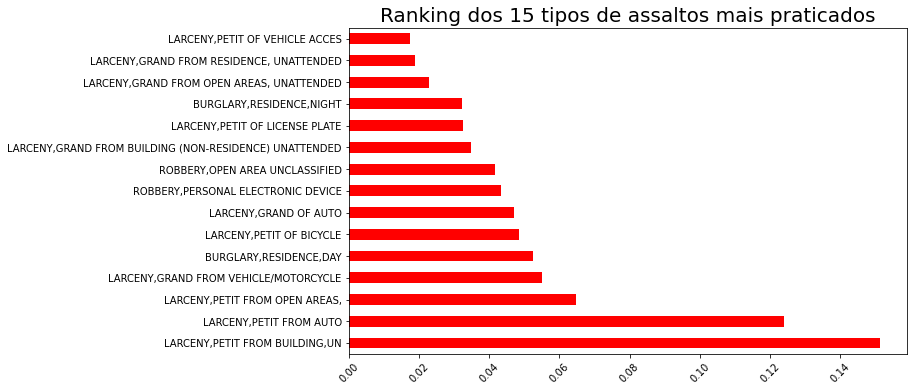

In [18]:
df[(df['assalto']==1) & (df['bairro']=="Brooklyn")].desc_delito.value_counts(normalize=True).head(15).plot(kind='barh', figsize=(10,6),color='r')
plt.title('Ranking dos 15 tipos de assaltos mais praticados', fontsize=20)
plt.xticks(rotation=45)
plt.show()

Pelo gráfico acima pode-se concluir que no bairro  **Brooklyn** :

 - Os assaltos a prédios lideram as estatísticas, seguidos de roubos a veículos, somando juntos mais de 25% dos tipos de assaltos.

# Manhattan
## Analisando os assaltos no bairro, de acordo com horário.

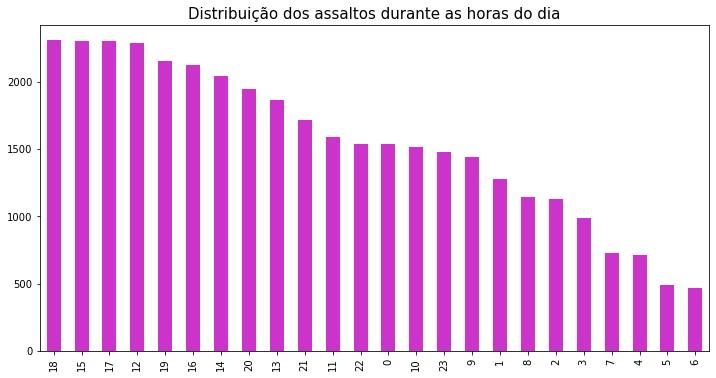

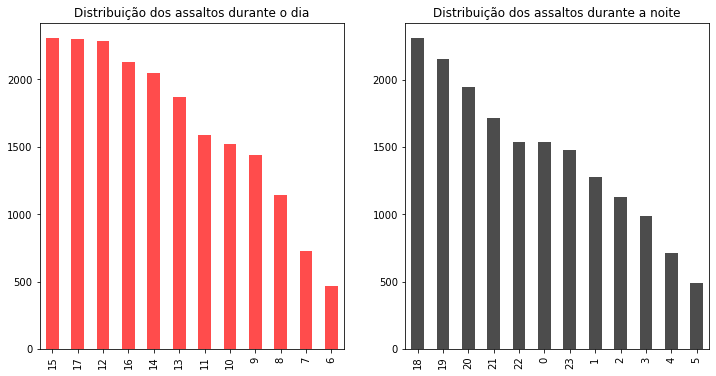

In [19]:
df[(df['assalto']==1) & (df['bairro']=="Manhattan")].hora.value_counts().plot(kind='bar',figsize=(12,6),color='m',alpha=0.8)
plt.title('Distribuição dos assaltos durante as horas do dia',fontsize=15)


fig, ax = plt.subplots(1,2, figsize=(12,6))

df[(df['assalto']==1) & (df['noite']==0)  & (df['bairro']=="Manhattan")].hora.value_counts().plot(kind='bar',ax=ax[0],color='r',alpha=0.7)
ax[0].set_title('Distribuição dos assaltos durante o dia')

df[(df['assalto']==1) & (df['noite']==1)  & (df['bairro']=="Manhattan")].hora.value_counts().plot(kind='bar',ax=ax[1],color='k',alpha=0.7)
ax[1].set_title('Distribuição dos assaltos durante a noite')
plt.show()

Pelos gráficos acima pode-se concluir que no bairro **Manhattan** :

 - No início da manhã a quantidade de assaltos é considerada baixa com relação aos horários com mais registros.
 - O número de assaltos aumenta, conforme as horas passsam, atingindo em 3 momentos seu ápice, sendo eles às 12 horas, às 15 horas e às 17 horas.
 - O número de assaltos cresce até as 19 horas, quando então começa a cair.
 - O período com menos ocorrências de assaltos vai das 3 horas até às 8 da manhã.

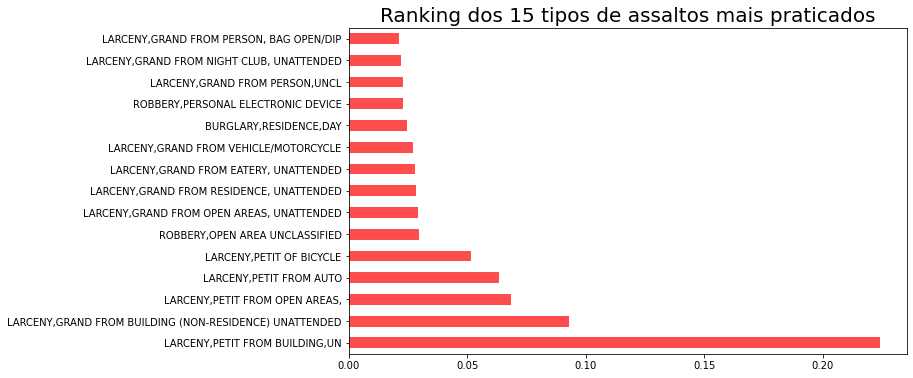

In [20]:
df[(df['assalto']==1) & (df['bairro']=="Manhattan")].desc_delito.value_counts(normalize=True).head(15).plot(kind='barh',figsize=(10,6),color='r',alpha=0.7)
plt.title('Ranking dos 15 tipos de assaltos mais praticados', fontsize=20)
plt.show()

Pelo gráfico acima pode-se concluir que no bairro **Manhattan** :

 - Os assaltos que lideram as estatísticas envolvem pequenos e grandes roubos a prédios, chegando a mais de 30% do total dos registros.

# Queens
## Analisando os assaltos no bairro, de acordo com horário.

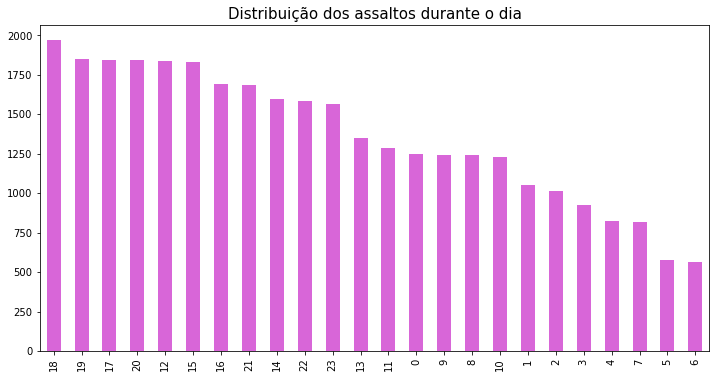

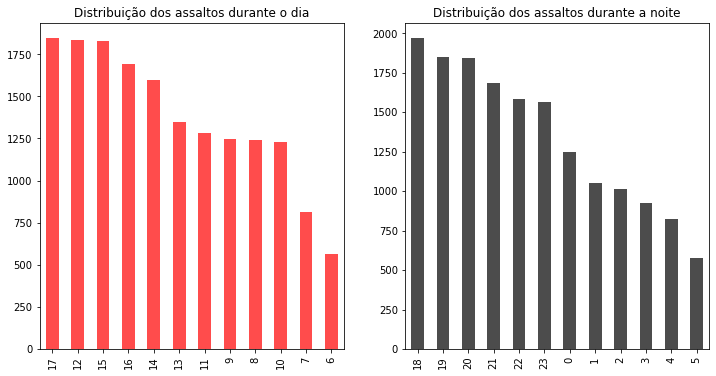

In [21]:
df[(df['assalto']==1) & (df['bairro']=="Queens")].hora.value_counts().plot(kind='bar',figsize=(12,6),color='m',alpha=0.6)
plt.title('Distribuição dos assaltos durante o dia',fontsize=15)


fig, ax = plt.subplots(1,2, figsize=(12,6))

df[(df['assalto']==1) & (df['noite']==0)  & (df['bairro']=="Queens")].hora.value_counts().plot(kind='bar',ax=ax[0],color='r',alpha=0.7)
ax[0].set_title('Distribuição dos assaltos durante o dia')

df[(df['assalto']==1) & (df['noite']==1)  & (df['bairro']=="Queens")].hora.value_counts().plot(kind='bar',ax=ax[1],color='k',alpha=0.7)
ax[1].set_title('Distribuição dos assaltos durante a noite')


plt.show()

Pelo gráfico acima pode-se concluir que no bairro do **Queens** :

 - Entre as 15 e 20 horas é o período que mais ocorrem assaltos.
 - O horário com mais registros é 18 horas.
 - O período com menos ocorrências de assaltos vai das 1 hora até às 7 horas da manhã.

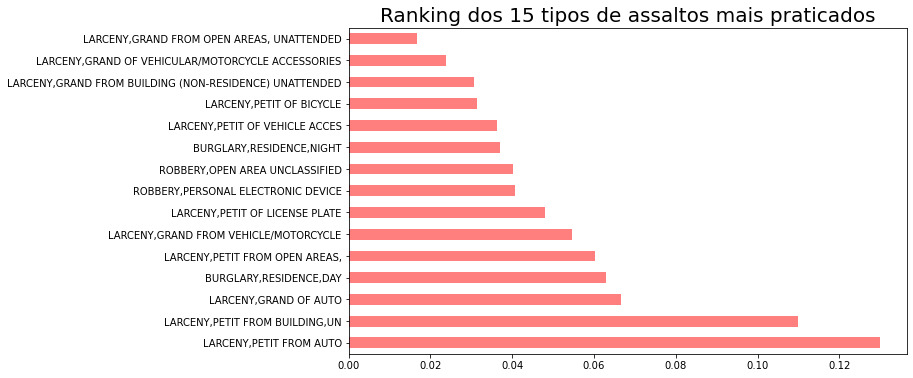

In [22]:
df[(df['assalto']==1) & (df['bairro']=="Queens")].desc_delito.value_counts(normalize=True).head(15).plot(kind='barh',figsize=(10,6),color='r',alpha=0.5)
plt.title('Ranking dos 15 tipos de assaltos mais praticados', fontsize=20)
plt.show()

Pelo gráfico acima pode-se concluir que no bairro  **Queens** :

 - O tipo de assalto que lidera as estatísticas envolve pequenos roubos/furtos de veículos(automóveis) seguido por pequenos roubos a prédios, com aproximadamente 25% dos registros.

# Bronx
## Analisando os assaltos no bairro, de acordo com horário.

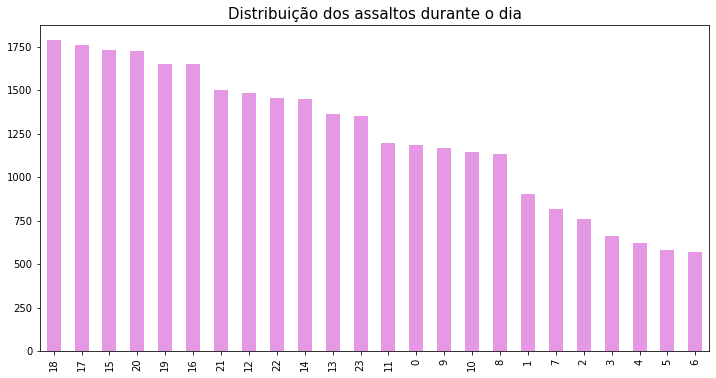

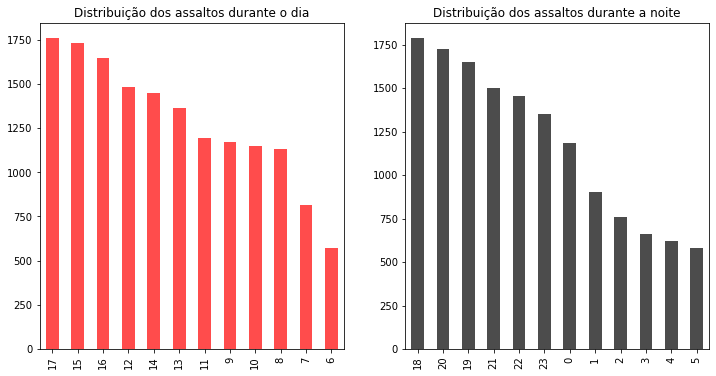

In [23]:
df[(df['assalto']==1) & (df['bairro']=="Bronx")].hora.value_counts().plot(kind='bar',figsize=(12,6),color='m',alpha=0.4)
plt.title('Distribuição dos assaltos durante o dia',fontsize=15)

fig, ax = plt.subplots(1,2, figsize=(12,6))

df[(df['assalto']==1) & (df['noite']==0)  & (df['bairro']=="Bronx")].hora.value_counts().plot(kind='bar',ax=ax[0],color='r',alpha=0.7)
ax[0].set_title('Distribuição dos assaltos durante o dia')

df[(df['assalto']==1) & (df['noite']==1)  & (df['bairro']=="Bronx")].hora.value_counts().plot(kind='bar',ax=ax[1],color='k',alpha=0.7)
ax[1].set_title('Distribuição dos assaltos durante a noite')


plt.show()

Pelos gráficos acima pode-se concluir que no bairro **Bronx** :

 - Entre as 15 e 20 horas é o período que mais ocorrem assaltos.
 - O horário com mais registros é 18 horas.
 - Após às 21 horas a quantidade de registros de assaltos tende a cair.
 - O período com menos ocorrências de assaltos vai das 2 horas até às 7 horas da manhã.

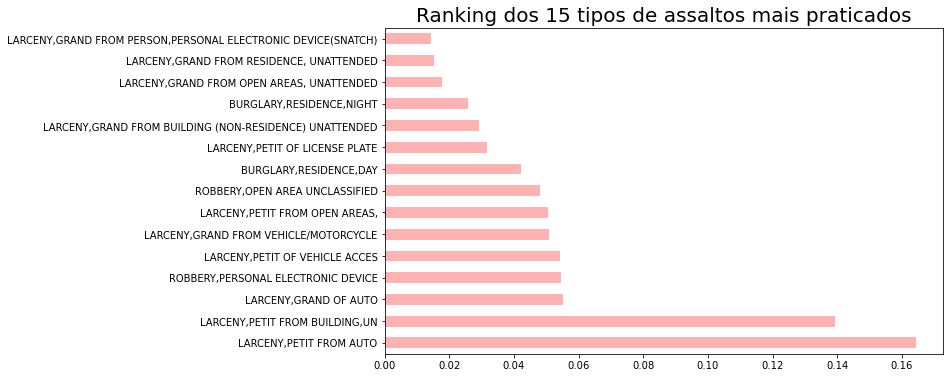

In [24]:
df[(df['assalto']==1) & (df['bairro']=="Bronx")].desc_delito.value_counts(normalize=True).head(15).plot(kind='barh',figsize=(10,6),color='r',alpha=0.3)
plt.title('Ranking dos 15 tipos de assaltos mais praticados', fontsize=20)
plt.show()

Pelo gráfico acima pode-se concluir que no bairro  **Bronx** :

 - O tipo de assalto que lidera as estatísticas envolve pequenos roubos/furtos de veículos(automóveis) seguido por pequenos roubos a prédios, com mais de  30% dos registros.

# Staten Island
## Analisando os assaltos no bairro, de acordo com horário.

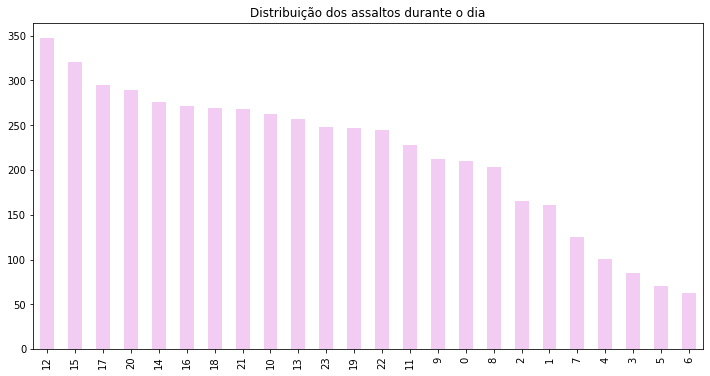

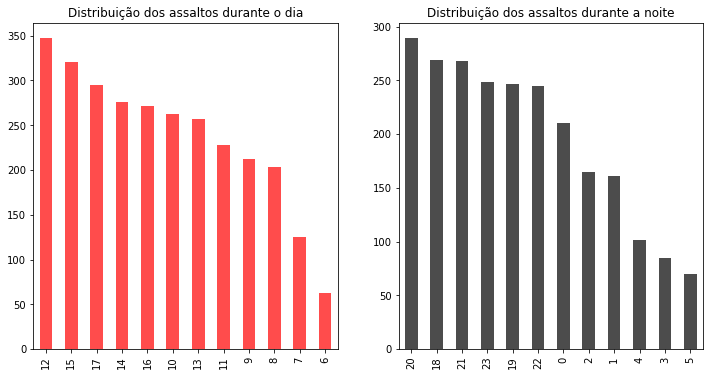

In [25]:
df[(df['assalto']==1) & (df['bairro']=="Staten_Island")].hora.value_counts().plot(kind='bar',figsize=(12,6),color='m',alpha=0.2)
plt.title('Distribuição dos assaltos durante o dia')

fig, ax = plt.subplots(1,2, figsize=(12,6))

df[(df['assalto']==1) & (df['noite']==0)  & (df['bairro']=="Staten_Island")].hora.value_counts().plot(kind='bar',ax=ax[0],color='r',alpha=0.7)
ax[0].set_title('Distribuição dos assaltos durante o dia')

df[(df['assalto']==1) & (df['noite']==1)  & (df['bairro']=="Staten_Island")].hora.value_counts().plot(kind='bar',ax=ax[1],color='k',alpha=0.7)
ax[1].set_title('Distribuição dos assaltos durante a noite')


plt.show()

Pelos gráficos acima pode-se concluir que no bairro **Staten Island** :

 - Entre as 12 e 20 horas é o período que mais ocorrem assaltos.
 - O horário com mais registros é 12 horas.
 - O período com menos ocorrências de assaltos vai das 1 hora até às 7 horas da manhã.

In [ ]:
df[(df['assalto']==1) & (df['bairro']=="Staten_Island")].desc_delito.value_counts(normalize=True).head(15).plot(kind='barh',figsize=(10,6),color='r',alpha=0.1)
plt.title('Ranking dos 15 tipos de assaltos mais praticados', fontsize=20)
plt.show()

Pelo gráfico acima pode-se concluir que no bairro  **Staten Island** :

 - O tipo de assalto que lidera as estatísticas envolve pequenos roubos/furtos de veículos(automóveis) seguido por pequenos roubos a prédios, com aproximadamente 32% dos registros.